# Chapter 2 Bike Data Cleanup

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile
zipurl = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('tmp/Bike-Sharing-Dataset')




In [3]:
bikes_hour_df_raw = pd.read_csv('tmp/Bike-Sharing-Dataset/hour.csv')
bikes_day_df_raw = pd.read_csv('tmp/Bike-Sharing-Dataset/day.csv')

In [4]:
bikes_hour_df_raw.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Remove Uneeded Features

In [5]:
bikes_hour_df = bikes_hour_df_raw.drop(['casual','registered'], axis=1)

In [6]:
bikes_hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [7]:
bikes_hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  cnt         17379 non-null  int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 2.0+ MB


In [8]:
bikes_hour_df['cnt'].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

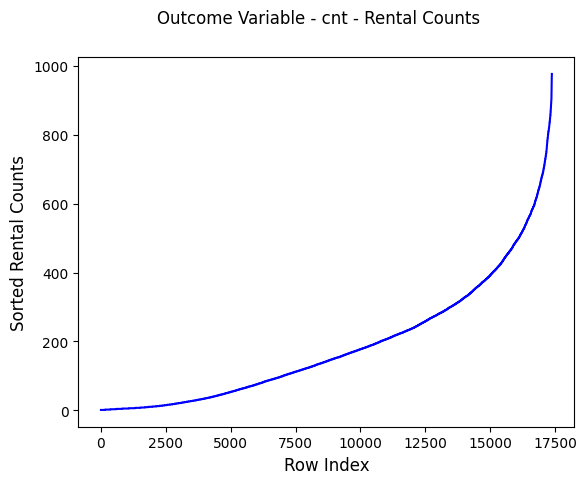

In [9]:
fig, ax = plt.subplots(1)
ax.plot(sorted(bikes_hour_df['cnt']), color='blue')
ax.set_xlabel("Row Index", fontsize=12)
ax.set_ylabel("Sorted Rental Counts", fontsize=12)
ax.set_ylabel("Sorted Rental Counts", fontsize=12)
fig.suptitle('Outcome Variable - cnt - Rental Counts')
plt.show()

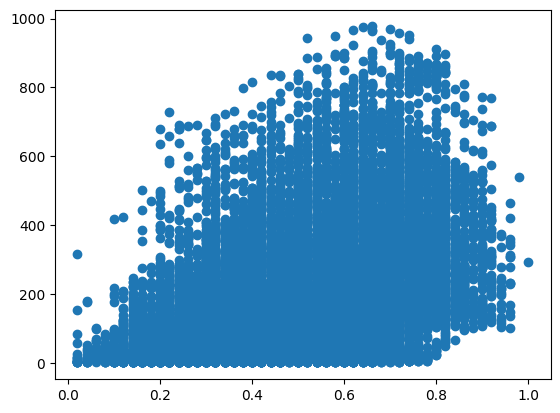

In [10]:
fig = plt.scatter(bikes_hour_df['temp'],bikes_hour_df['cnt'])
plt.show()

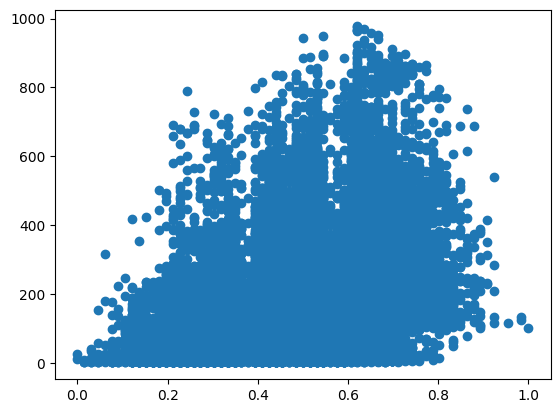

In [11]:
fig = plt.scatter(bikes_hour_df['atemp'],bikes_hour_df['cnt'])
plt.show()

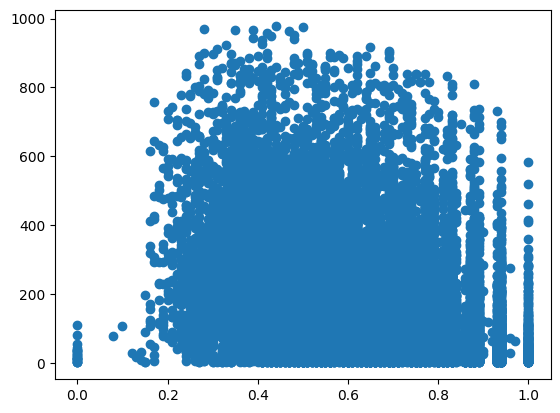

In [12]:
fig = plt.scatter(bikes_hour_df['hum'],bikes_hour_df['cnt'])
plt.show()

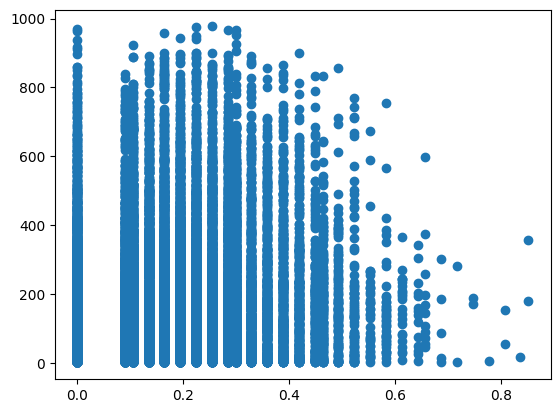

In [13]:
fig = plt.scatter(bikes_hour_df['windspeed'],bikes_hour_df['cnt'])
plt.show()

In [14]:
bikes_hour_df['season'].describe()

count    17379.000000
mean         2.501640
std          1.106918
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          4.000000
Name: season, dtype: float64

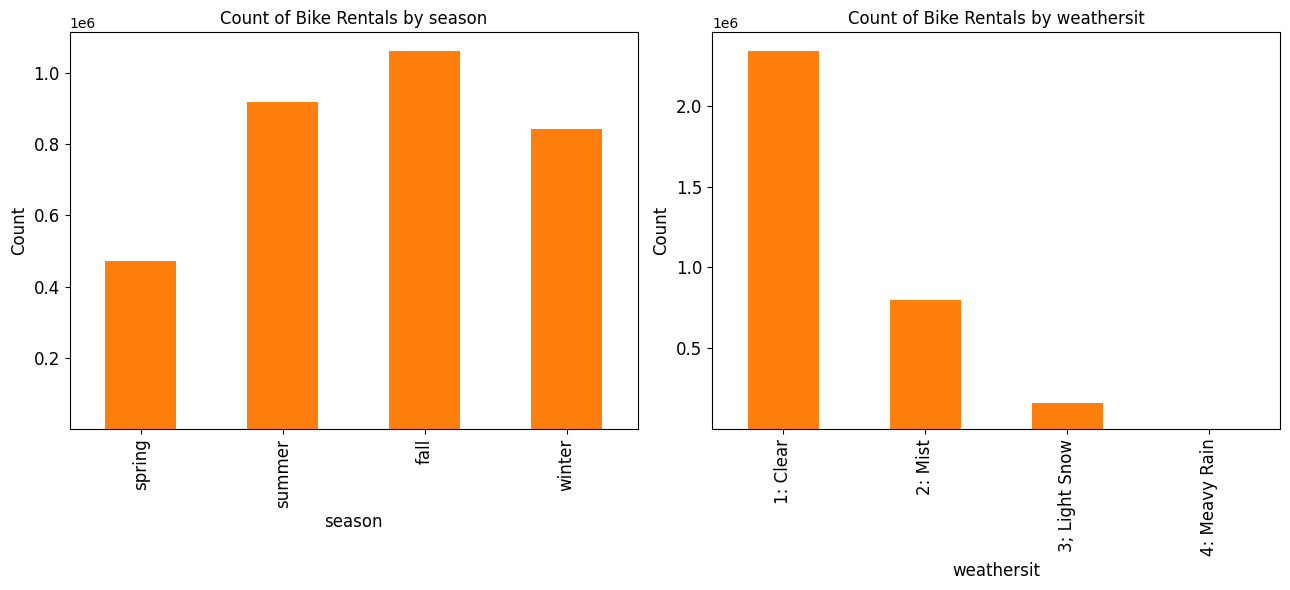

In [15]:
f, (ax1, ax2) =plt.subplots(nrows=1,ncols=2, figsize=(13, 6))
ax1 = bikes_hour_df[['season','cnt']].groupby(['season']).sum().reset_index().plot(kind='bar',
    legend = False, title = 'Count of Bike Rentals by season',
    stacked =True, fontsize=12, ax=ax1)
ax1.set_xlabel("season", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)
ax1.set_xticklabels(['spring','summer','fall','winter'])
 
ax2 = bikes_hour_df[['weathersit', 'cnt']].groupby(['weathersit']).sum().reset_index().plot(kind='bar',
    legend = False, title = 'Count of Bike Rentals by weathersit',
    stacked =True, fontsize=12, ax=ax2)
ax2.set_xlabel("weathersit", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)
ax2.set_xticklabels(['1: Clear','2: Mist','3; Light Snow','4: Meavy Rain'])
 
 
f.tight_layout()

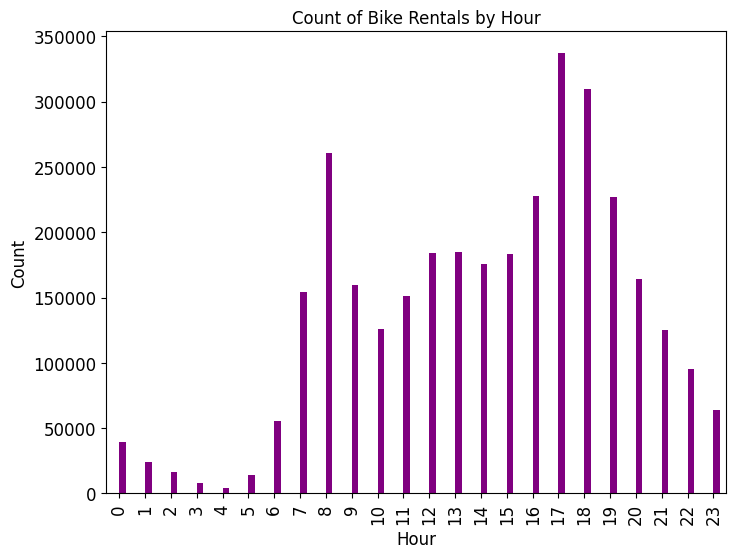

In [16]:
ax = bikes_hour_df[['hr', 'cnt']].groupby(['hr']).sum().reset_index().plot(kind='bar', figsize=(8,6),
                                                                                 legend = False, title = 'Count of Bike Rentals by Hour',
                                                                                 color = 'purple', fontsize=12)
ax.set_xlabel('Hour', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
plt.show()

In [17]:
bikes_hour_df = bikes_hour_df_raw.drop(['casual','registered','atemp'], axis=1)

# Create two sets of data one for fitting and one for test

In [18]:
bike_df_model_ready = bikes_hour_df.copy()

outcome = 'cnt'
excludes = ['instant', 'dteday', outcome]
features = [feat for feat in list(bike_df_model_ready) if feat not in excludes]

# features = []
# for feat in list(bike_df_model_ready):
#     if feat not in excludes:
#         features.append(feat)
print(features)


['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed']


In [19]:
x_train, x_test, y_train, y_test = train_test_split(bike_df_model_ready[features],
                                                    bike_df_model_ready[outcome],
                                                    test_size=0.3,
                                                    random_state=42)

from sklearn import linear_model
model_lr = linear_model.LinearRegression()
model_lr.fit(x_train, y_train)

predictions = model_lr.predict(x_test)

predictions[0:5]

array([459.79784454, 209.99408496,  60.25240658, 385.05143146,
       -14.05311475])

### Evaluate the data

In [20]:
y_test.values[0:5]

array([425,  88,   4, 526,  13])

In [21]:
error = sqrt(mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', round(error, 2))

Root Mean Squared Error: 139.31


# Example of using the model

In [22]:
today = x_test.iloc[0]
today
 

season         3.000
yr             1.000
mnth           6.000
hr            19.000
holiday        0.000
weekday        6.000
workingday     0.000
weathersit     1.000
temp           0.800
hum            0.270
windspeed      0.194
Name: 12830, dtype: float64

In [23]:
prediction_for_today = model_lr.predict([today])[0]
print('Prediction for first recod in test set:', round(prediction_for_today, 2))

Prediction for first recod in test set: 459.8


# Use Polynomials to Improve Results

In [24]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)


In [25]:
x_train[0:5]

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed
11229,2,1,4,2,0,3,1,2,0.50,0.42,0.1940
6334,4,0,9,12,0,1,1,2,0.68,0.79,0.1642
11060,2,1,4,0,0,3,1,1,0.34,0.36,0.4179
12346,2,1,6,15,0,0,0,1,0.70,0.34,0.0000
15437,4,1,10,10,0,3,1,1,0.56,0.52,0.2985


In [26]:
x_train_poly[0:5]

array([[1.0000000e+00, 2.0000000e+00, 1.0000000e+00, 4.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 3.0000000e+00, 1.0000000e+00,
        2.0000000e+00, 5.0000000e-01, 4.2000000e-01, 1.9400000e-01,
        4.0000000e+00, 2.0000000e+00, 8.0000000e+00, 4.0000000e+00,
        0.0000000e+00, 6.0000000e+00, 2.0000000e+00, 4.0000000e+00,
        1.0000000e+00, 8.4000000e-01, 3.8800000e-01, 1.0000000e+00,
        4.0000000e+00, 2.0000000e+00, 0.0000000e+00, 3.0000000e+00,
        1.0000000e+00, 2.0000000e+00, 5.0000000e-01, 4.2000000e-01,
        1.9400000e-01, 1.6000000e+01, 8.0000000e+00, 0.0000000e+00,
        1.2000000e+01, 4.0000000e+00, 8.0000000e+00, 2.0000000e+00,
        1.6800000e+00, 7.7600000e-01, 4.0000000e+00, 0.0000000e+00,
        6.0000000e+00, 2.0000000e+00, 4.0000000e+00, 1.0000000e+00,
        8.4000000e-01, 3.8800000e-01, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        0.0000000e+00, 9.0000000e+00, 3.0000000e

In [27]:
model_lr_poly = linear_model.LinearRegression()
model_lr_poly.fit(x_train_poly, y_train)

predictions_poly = model_lr_poly.predict(x_test_poly)

predictions_poly[0:5]

array([556.03379284,  95.42885348,  21.62867677, 423.91275803,
       -95.24324151])

In [28]:
print("Root Mean squared error with PolynomialFeatures set to 2 degrees: %.2f" % sqrt(mean_squared_error(y_test, predictions_poly)))

Root Mean squared error with PolynomialFeatures set to 2 degrees: 120.48


In [29]:
def prepare_data_for_model(raw_dataframe,
                           target_columns,
                           drop_first = False,
                           make_na_col = True):
    # dummy all categorical fields
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, drop_first=drop_first,
dummy_na=make_na_col)
    return (dataframe_dummy)

In [30]:
bike_df_model_ready_with_dummies = prepare_data_for_model(bike_df_model_ready,
           target_columns = ['season', 'weekday', 'weathersit'], drop_first = True)

In [31]:
bike_df_model_ready[0:5]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1


In [32]:
bike_df_model_ready_with_dummies[0:5]

,instant,dteday,yr,mnth,hr,holiday,workingday,temp,hum,windspeed,cnt,season_2.0,season_3.0,season_4.0,season_nan,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,weekday_nan,weathersit_2.0,weathersit_3.0,weathersit_4.0,weathersit_nan
0,1,2011-01-01,0,1,0,0,0,0.24,0.81,0.0,16,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
1,2,2011-01-01,0,1,1,0,0,0.22,0.80,0.0,40,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
2,3,2011-01-01,0,1,2,0,0,0.22,0.80,0.0,32,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
3,4,2011-01-01,0,1,3,0,0,0.24,0.75,0.0,13,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,5,2011-01-01,0,1,4,0,0,0.24,0.75,0.0,1,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [34]:
def prepare_data_for_model(raw_dataframe, 
                           target_columns, 
                           drop_first = False, 
                           make_na_col = True):
    
    # dummy all categorical fields 
    dataframe_dummy = pd.get_dummies(raw_dataframe, columns=target_columns, 
                                     drop_first=drop_first, 
                                     dummy_na=make_na_col)
    return (dataframe_dummy)

# make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                            target_columns = ['season', 
                                                              'weekday', 
                                                              'weathersit'],
                                            drop_first = True)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant',  'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
 
# train the model on training set
model_lr.fit(X_train, y_train)

# make predictions using the testing set
predictions = model_lr.predict(X_test)
 
# print coefficients as this is what our web application will use in the end
print('Coefficients: \n', model_lr.coef_)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Coefficients: 
 [[ 8.15107092e+01 -3.21006113e-01  7.32438675e+00 -2.17983603e+01
   1.25204473e+01  3.52310117e+02 -1.99407687e+02  3.36677045e+01
   2.56080978e+01  1.32103857e+00  7.21009360e+01  4.97379915e-14
  -4.36846089e+00  5.91228633e-01 -2.66474469e+00 -3.98667404e+00
   1.15073805e+00  1.22633344e+01  2.13162821e-14  9.18816109e+00
  -2.47479915e+01  2.78551408e+01  0.00000000e+00]]
Root Mean squared error: 139.46


In [35]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df.copy()
bike_df_model_ready = bike_df_model_ready.sort_values('instant')

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready, 
                                             target_columns = ['season', 'weekday', 'weathersit'])
list(bike_df_model_ready.head(1).values)

# remove the nan colums in dataframe as most are outcome variable and we can't use them
bike_df_model_ready = bike_df_model_ready.dropna() 


outcome = 'cnt'
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday']]  

 
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.5, 
                                                 random_state=42)
 
from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))
 

Root Mean squared error: 72.58


In [36]:
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum()
bikes_hour_df_shift.head()

cnt
dteday     hr     
2011-01-01 0    16
           1    40
           2    32
           3    13
           4     1

In [37]:
# prior hours
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])
# shift the count of the last two hours forward so the new count can take in consideration how the last two hours went
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)
# merge the date and hour counts back to bike_df_model_ready
bike_df_model_ready =  pd.merge(bikes_hour_df, bikes_hour_df_shift[['dteday', 'hr', 'sum_hr_shift_1', 'sum_hr_shift_2']], how="inner", on = ['dteday', 'hr'])


In [38]:
bike_df_model_ready[0:5]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,sum_hr_shift_1,sum_hr_shift_2
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.81,0.0,16,NaN,NaN
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.80,0.0,40,16.0,NaN
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.80,0.0,32,40.0,16.0
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.75,0.0,13,32.0,40.0
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.75,0.0,1,13.0,32.0


In [39]:
# prior hours
bikes_hour_df_shift = bikes_hour_df[['dteday','hr','cnt']].groupby(['dteday','hr']).sum().reset_index()
bikes_hour_df_shift.sort_values(['dteday','hr'])
# shift the count of the last two hours forward so the new count can take in consideratio how the last two hours went 
bikes_hour_df_shift['sum_hr_shift_1'] = bikes_hour_df_shift.cnt.shift(+1)
bikes_hour_df_shift['sum_hr_shift_2'] = bikes_hour_df_shift.cnt.shift(+2)

bike_df_model_ready =  pd.merge(bikes_hour_df, bikes_hour_df_shift[['dteday', 'hr', 'sum_hr_shift_1', 'sum_hr_shift_2']], how='inner', on = ['dteday', 'hr'])

# drop NAs caused by our shifting fields around
bike_df_model_ready = bike_df_model_ready.dropna()

outcome = 'cnt'
# create a feature list for each modeling - experiment by adding features to the exclusion list
features = [feat for feat in list(bike_df_model_ready) if feat not in [outcome, 'instant', 'dteday','casual', 'registered']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)

from sklearn.ensemble import GradientBoostingRegressor
model_gbr = GradientBoostingRegressor()
model_gbr.fit(X_train, np.ravel(y_train))
predictions = model_gbr.predict(X_test)

# root mean squared error
print("Root Mean squared error: %.2f" % sqrt(mean_squared_error(y_test, predictions)))

Root Mean squared error: 43.22


In [40]:
# prior hours
bikes_hour_df_shift['sum_hr_shift_1']

0          NaN
1         16.0
2         40.0
3         32.0
4         13.0
         ...  
17374    122.0
17375    119.0
17376     89.0
17377     90.0
17378     61.0
Name: sum_hr_shift_1, Length: 17379, dtype: float64

In [41]:
# prior hours
np.mean(bikes_hour_df_shift['sum_hr_shift_1'])


np.float64(189.47117044539073)

In [42]:
# loop through each feature and calculate the R^2 score
features = ['hr', 'season', 'holiday', 'temp']
from sklearn import linear_model
from sklearn.metrics import r2_score

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
    
for feat in features:
    model_lr = linear_model.LinearRegression()
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))

R^2 for hr is 0.159431
R^2 for season is 0.025891
R^2 for holiday is -0.001242
R^2 for temp is 0.168313


In [48]:
# simple approach - make a copy for editing without affecting original
bike_df_model_ready = bikes_hour_df[['hr', 'season', 'holiday', 'temp', 'cnt']].copy()

outcome = 'cnt'

# dummify categorical columns
bike_df_model_ready = prepare_data_for_model(bike_df_model_ready,  drop_first = False, 
                                             make_na_col = False, target_columns = ['season'])

features = [feat for feat in bike_df_model_ready if feat not in ['cnt']]  

# split data into train and test portions and model
X_train, X_test, y_train, y_test = train_test_split(bike_df_model_ready[features], 
                                                 bike_df_model_ready[['cnt']], 
                                                 test_size=0.3, random_state=42)
from sklearn import linear_model
model_lr = linear_model.LinearRegression()

total_R2 = 0
for feat in features:
    model_lr = linear_model.LinearRegression()
    # train the model on training set
    model_lr.fit(X_train[[feat]], y_train)
    predictions = model_lr.predict(X_test[[feat]])
    
    print('R^2 for %s is %f' % (feat, r2_score(y_test, predictions)))
    total_R2 += r2_score(y_test, predictions)
print('Total R^2 is %f' % (total_R2))

R^2 for hr is 0.160129
R^2 for holiday is -0.000566
R^2 for temp is 0.166963
R^2 for season_1 is 0.058428
R^2 for season_2 is 0.004411
R^2 for season_3 is 0.021628
R^2 for season_4 is -0.001285
Total R^2 is 0.409708


In [49]:
from sklearn import linear_model
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train, y_train)
print('Intercept: %f' % model_lr.intercept_)

Intercept: -119.061877


In [50]:
feature_coefficients = pd.DataFrame({'coefficients':model_lr.coef_[0],
                                    'features':X_train.columns.values})
feature_coefficients.sort_values('coefficients')

,coefficients,features
5,-42.697445,season_3
1,-29.096613,holiday
4,-3.808865,season_2
3,3.523756,season_1
0,8.626766,hr
6,42.982554,season_4
2,425.523181,temp


In [51]:
INTERCEPT = -119.061877
COEF_HOLIDAY = -29.096613   # if day is holiday or not
COEF_HOUR = 8.626766	    # hour (0 to 23)
COEF_SEASON_1 = 3.523756    # 1: spring
COEF_SEASON_2 = -3.808865   # 2: summer
COEF_SEASON_3 = -42.697445  # 3: fall
COEF_SEASON_4 = 42.982554   # 4: winter
COEF_TEMP = 425.523181      # normalized temp in Celsius -8 to +39

In [55]:
bikes_hour_df['temp'].describe()

count    17379.000000
mean         0.496987
std          0.192556
min          0.020000
25%          0.340000
50%          0.500000
75%          0.660000
max          1.000000
Name: temp, dtype: float64

In [57]:
MEAN_HOLIDAY = 0   # if day is holiday or not
MEAN_HOUR = 11.546752   # hour (0 to 23)
MEAN_SEASON_1 = 0  # 1: spring
MEAN_SEASON_2 = 0  # 2: summer
MEAN_SEASON_3 = 1  # 3: fall
MEAN_SEASON_4 = 0  # 4: winter
MEAN_TEMP = 0.496987 # normalized temp in Celsius -8 to +39

In [58]:
rental_counts = INTERCEPT + (MEAN_HOLIDAY * COEF_HOLIDAY) \
        + (9 * COEF_HOUR) \
        + (MEAN_SEASON_1 * COEF_SEASON_1)  + (MEAN_SEASON_2 * COEF_SEASON_2) \
        + (MEAN_SEASON_3 * COEF_SEASON_3)  + (MEAN_SEASON_4 * COEF_SEASON_4) \
        + (MEAN_TEMP * COEF_TEMP)
print('Estimated bike rental count for selected parameters: %i' % int(rental_counts))

Estimated bike rental count for selected parameters: 127
